<a href="https://colab.research.google.com/github/onuralpArsln/finTech/blob/main/sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests

def getMassData(lastDay=1):
    url = 'https://api.binance.com/api/v3/klines'
    current_time = int(time.time() * 1000)
    startDay = current_time - ((lastDay + 364) * 24 * 60 * 60 * 1000)
    endDay = current_time - (lastDay * 24 * 60 * 60 * 1000)

    params = {
        'symbol': 'BTCUSDT',      # The trading pair you're interested in
        'interval': '1h',         # 1-hour candlestick data (hourly prices)
        'startTime': startDay,    # Data from 300 days ago
        'endTime': endDay,        # Data until lastDay
        'limit': 960             # Maximum number of data points per request
    }

    print(endDay - startDay)
    result = []
    while  startDay <  endDay - 86400000:
        time.sleep(1)
        print("calisyom")
        print(startDay)

        response = requests.get(url, params=params)
        data = response.json()
        print(data[-1:])

        if not data:  # Break if no more data is returned
            break

        for candle in data:
            close_price = candle[4]
            result.append(close_price)

        # Update startTime for the next request to get older data
        # The last candle's timestamp will be used to set the new startTime
        startDay = data[-1][0]  # Get the timestamp of the last candle
        params['startTime'] = startDay  # Set the new start time

    return result


In [ ]:
import csv

import pandas as pd

data = getMassData()

test_data = data[-10:]

train_data = data[:-10]


df = pd.DataFrame(data)

print("Size (shape):", df.shape)

df.to_csv('data/massData.csv', index=False, header=False)

31449600000
calisyom
1695476962075
[[1698930000000, '35351.12000000', '35367.11000000', '34680.00000000', '34926.96000000', '4493.79779000', 1698933599999, '157505329.83909820', 128024, '2103.25239000', '73714995.35326520', '0']]
calisyom
1698930000000
[[1702382400000, '41584.58000000', '41906.45000000', '41584.57000000', '41849.99000000', '1356.41499000', 1702385999999, '56670118.44096610', 53532, '746.48182000', '31187165.64148030', '0']]
calisyom
1702382400000
[[1705834800000, '41786.00000000', '41795.61000000', '41686.00000000', '41719.89000000', '401.37890000', 1705838399999, '16760023.31858480', 25127, '175.49606000', '7328293.97013910', '0']]
calisyom
1705834800000
[[1709287200000, '62129.14000000', '62188.00000000', '61859.29000000', '61991.11000000', '1774.98071000', 1709290799999, '110114669.61051010', 60737, '755.33864000', '46863145.65896760', '0']]
calisyom
1709287200000
[[1712739600000, '69011.92000000', '69171.75000000', '68902.43000000', '69139.20000000', '642.38466000'

In [29]:
import csv

import pandas as pd
url = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/massData.csv"


df= pd.read_csv(url, header=None)
data=df.values.tolist()
single_dimensional_list = [item[0] for item in data]


In [35]:
data=single_dimensional_list

print(len(data))

test_amount = 50

test_data = data[-test_amount:]

train_data = data[:-test_amount]

8745


In [40]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = train_data  # Replace with your data

# Ensure the data is fully numeric and clean up any non-numeric entries
# Convert data to a Pandas Series first
df = pd.Series(data)

# Attempt to convert all values to numeric, coercing non-numeric values to NaN
df = pd.to_numeric(df, errors='coerce')

# Drop any NaN values that were caused by non-numeric entries
df = df.dropna()

# Check if the conversion and cleaning worked
if df.isnull().values.any():
    raise ValueError("The data still contains non-numeric values after conversion.")

# Fit the SARIMAX model (adjust p, d, q, and seasonal parameters as needed)
model = SARIMAX(df, order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  # Adjust the order if necessary
model_fit = model.fit(disp=False)

# Forecast the next 10 values
forecast = model_fit.forecast(steps=test_amount)

# Print the forecasted values
print(forecast.to_list())
print(test_data)




[62646.18087521114, 62645.77136768953, 62650.7498380938, 62658.152797922, 62646.90432463207, 62661.86621514535, 62678.3138055574, 62684.81336445122, 62683.362476330476, 62679.04667848435, 62668.6694643674, 62698.143274624614, 62694.86714041525, 62700.104783736504, 62701.97650214472, 62710.25030149293, 62699.33181192992, 62715.32072517112, 62731.69381458627, 62737.55502037293, 62737.708502117566, 62730.081244679284, 62719.19915505507, 62745.82711525502, 62742.56931963763, 62747.86612401493, 62749.764517615564, 62758.05113662005, 62747.19200121175, 62763.19491207267, 62779.62303686619, 62785.481875693375, 62785.70614772211, 62778.050455759774, 62767.21842502456, 62793.82212284141, 62790.61901780765, 62795.919235092115, 62797.87199568775, 62806.161276815175, 62795.356423783305, 62811.3617080061, 62827.8436785836, 62833.70443723929, 62833.98231620132, 62826.32800122731, 62815.54899142075, 62842.15381879478, 62839.00339727422, 62844.304727148694]
[62924.07, 63035.98, 62935.83, 63154.04, 635

In [41]:
forecast_list = forecast.to_list()


list1 = [float(value) for value in forecast_list]
list2 = [float(value) for value in test_data]

"""
for i in range(len(list1)):
    print(int(list1[i]) - int(list2[i]))
"""

'\nfor i in range(len(list1)):\n    print(int(list1[i]) - int(list2[i]))\n'

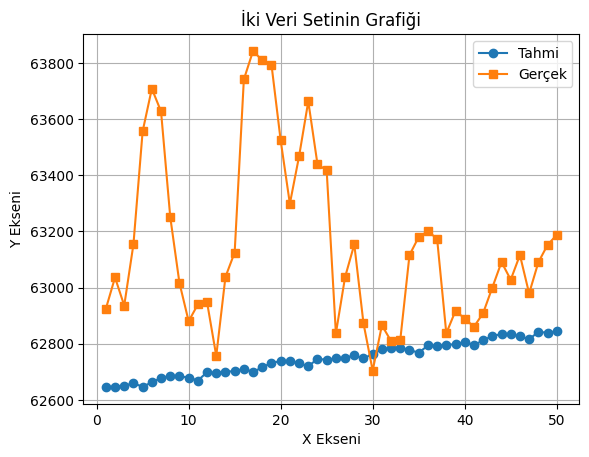

In [42]:
import matplotlib.pyplot as plt

# Örnek veriler
y1 = list1  # İlk Y ekseni verileri
y2 = list2   # İkinci Y ekseni verileri

# X eksenini otomatik olarak oluştur
x = range(1, len(y1) + 1)  # 1'den başlayarak y1'in uzunluğu kadar

# Grafiği çiz
plt.plot(x, y1, marker='o', label='Tahmi')  # İlk veri seti
plt.plot(x, y2, marker='s', label='Gerçek')  # İkinci veri seti

# Grafik özellikleri
plt.title('İki Veri Setinin Grafiği')  # Grafik başlığı
plt.xlabel('X Ekseni')  # X ekseni etiketi
plt.ylabel('Y Ekseni')  # Y ekseni etiketi
plt.legend()  # Legend ekle
plt.grid(True)  # Izgara çizgilerini göster
plt.show()  # Grafiği göster

